In [43]:
# Projects which can be done using Logistic Regression
# 1. Customer Churn Prediction
# 2. Email Spam Detection
# 3. Heart Disease Prediction
# 4. Loan Approval Prediction
# 5. Titanic Survival Prediction
# 6. Diabetes Prediction
# 7. Brest Cancer Prediction

In [1]:
# Creating Word Cloud

import nltk 
from nltk.corpus import stopwords
from collections import Counter

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [4]:
# Importing the dataset

df = pd.read_csv('../data/spam.csv', encoding='latin-1')

In [5]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [8]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# rename columns {v1: Category, v2: Message}

df.rename(columns={'v1': 'Category', 'v2': 'Message'}, inplace=True)

In [10]:
# generate word cloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [11]:
# our message is in df['Message']
df['Message'].dropna().str.lower() # convert to lower case

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Message, Length: 5572, dtype: object

In [12]:
word_string = " ".join(df['Message'].dropna().str.lower())

In [13]:
word_string

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat... ok lar... joking wif u oni... free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c\'s apply 08452810075over18\'s u dun say so early hor... u c already then say... nah i don\'t think he goes to usf, he lives around here though freemsg hey there darling it\'s been 3 week\'s now and no word back! i\'d like some fun you up for it still? tb ok! xxx std chgs to send, å£1.50 to rcv even my brother is not like to speak with me. they treat me like aids patent. as per your request \'melle melle (oru minnaminunginte nurungu vettam)\' has been set as your callertune for all callers. press *9 to copy your friends callertune winner!! as a valued network customer you have been selected to receivea å£900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only. had your mobile 11 months or more?

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(word_string)

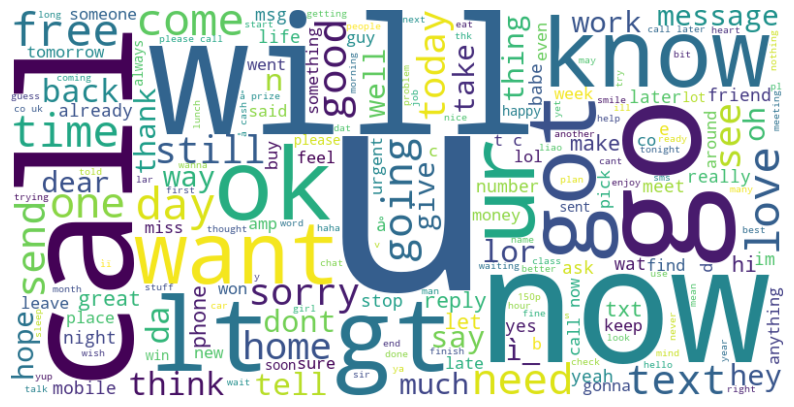

In [15]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
# generating word cloud for spam messages

spam_df = df[df['Category'] == 'spam']

In [17]:
spam_df

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [18]:
spam_words = " ".join(spam_df['Message'].str.lower())

In [19]:
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

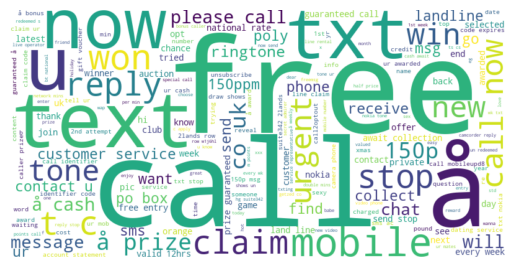

In [20]:
plt.Figure(figsize=(10, 10))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Data Processing

In [21]:
df.loc[df['Category'] == 'spam', 'Category'] = 0
df.loc[df['Category'] == 'ham', 'Category'] = 1

In [22]:
df

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [23]:
# select target and features
X = df['Message']
y = df['Category']

In [24]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [25]:
# feature extraction
# initialize TF-IDF vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [26]:
# feature extraction for training and testing data
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [27]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [28]:
X_train

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object

In [29]:
# create and fit logistic regression model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [30]:
model.fit(X_train_features, y_train)

LogisticRegression()

In [31]:
# predict on test data
y_pred = model.predict(X_test_features)

In [32]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(1115,))

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [34]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

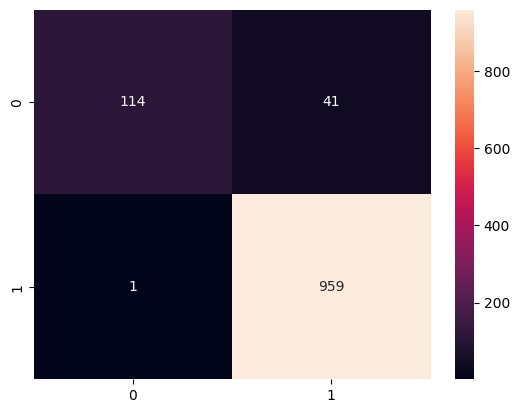

In [35]:
sns.heatmap(cm, annot=True, fmt='d')

In [36]:
TP = 959
TN = 114
FP = 41
FN = 1

# accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.9623318385650225

In [37]:
# Also we can use accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9623318385650225

In [38]:
# precision
precision = TP / (TP + FP)
precision

0.959

In [39]:
# test on user given input
new_mail = ['Congratulations, you have won iphone 16. Please click on the link to claim your prize']

In [40]:
new_mail_features = feature_extraction.transform(new_mail)

In [41]:
# predict
prediction_new = model.predict(new_mail_features)

In [42]:
if prediction_new == '1':
    print('This is not a spam message.')
else:
    print('This is a spam message.')

This is a spam message.
